# calculate binary classification accuracy between bands

In [1]:
import numpy as np
from ecog_band.datasetAllband import SVMDataset, AllBandDataset
from ecog_band.models import SVMBinClassifier, DecisionTreeBinClassifier, RandomForestBinClassifier, KNeighborsBinClassifier, GaussianNBBinClassifier
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import os
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from ecog_band.utils import *
from ecog_band.solver import Nfold_solver
import pandas as pd
# from ecog_band.datasetExcludeBand import CustomDatasetExcband

/root/pp/covert-reading/Ecog_pretrain/ecog_band/solver.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm  # may raise warning about Jupyter


In [2]:
HS = 69
freq = 500
elec = 7
path_elec = f'/public/DATA/overt_reading/dataset_/HS{HS}/{freq}/{elec}'
y_save_path = f'/root/pp/covert-reading/Ecog_pretrain/accuracy_results_ml/HS{HS}/{freq}/{elec}'
# contribution_save_path = f'/root/pp/covert-reading/Ecog_pretrain/Bclassification_results_ml_avg/HS{HS}/{freq}/{elec}'
band_list = get_all_band()
num_samples = len(os.listdir(path_elec))

os.makedirs(y_save_path, exist_ok=True)

data_shape: (720, 375)


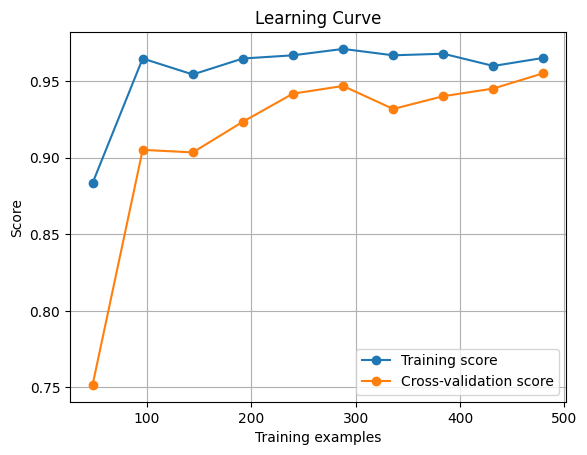

Accuracy on test set band_else1: 0.9083333333333333


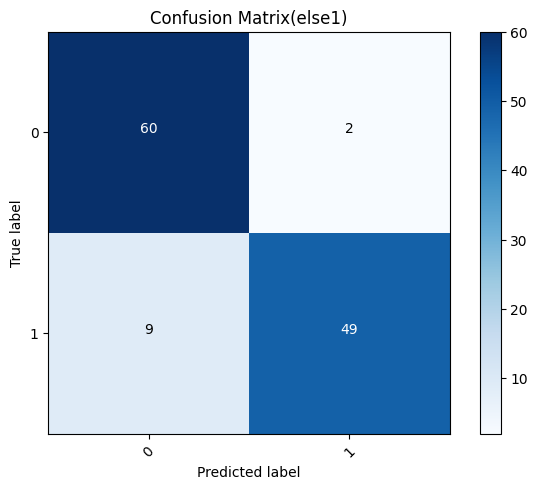

data_shape: (720, 1125)


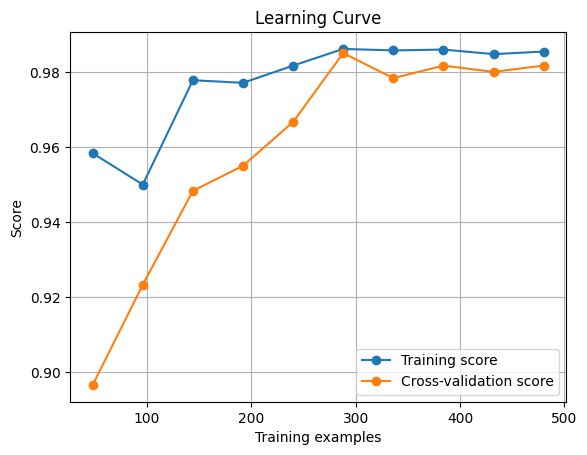

Accuracy on test set band_delta: 0.9166666666666666


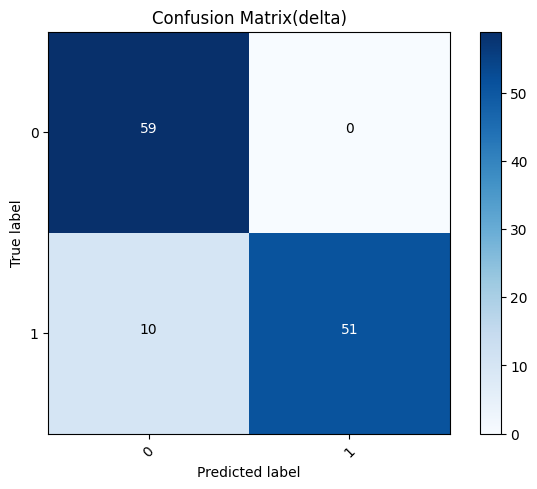

In [3]:
# classify test on each band
for band in band_list:
    data_loader = SVMDataset(HS, path_elec, freq, elec, num_samples, band, exclude=False)
    data, labels = data_loader.get_data_labels()
    print(f'data_shape: {data.shape}')
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=1/6, random_state=42)
    svm = DecisionTreeBinClassifier()
    svm.train(x_train=X_train, y_train=y_train)

    y_pred = svm.evaluate(X_test=X_test, y_test=y_test)
    band_acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set band_{band}: {band_acc}")

    np.save(os.path.join(y_save_path, f'{band}_y_pred.npy'), y_pred)
    np.save(os.path.join(y_save_path, f'{band}_y_true.npy'), y_test)
    # plt confusion matrix
    plt_confusion_matric(y_test, y_pred, f'{band}')


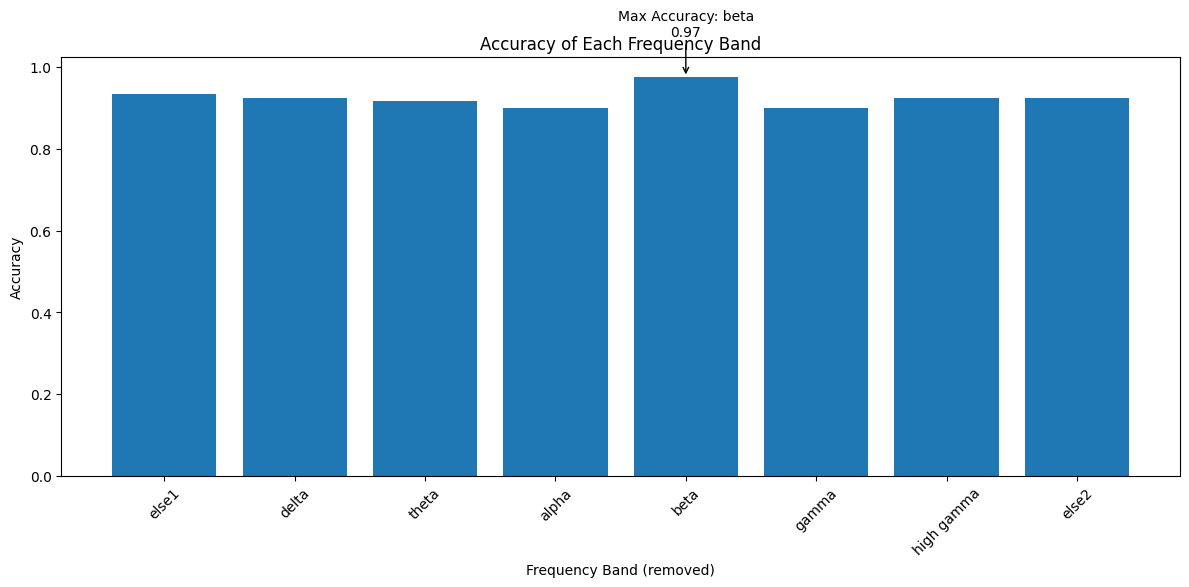

In [5]:
# show accuracy for each band
from ecog_band.utils import pltbar_accuracy
accuracy = []
for band in band_list:
    accuracy.append(cal_acc_band1_from_y(y_save_path, band))
pltbar_accuracy(accuracy, band_list, removed=True)

# do binary classification by all bands(concate all bands not average)

In [2]:
HS = 69
freq = 500
elec = 7
path_elec = f'/public/DATA/overt_reading/dataset_/HS{HS}/{freq}/{elec}'
num_samples = len(os.listdir(path_elec))
data_loader = AllBandDataset(HS, path_elec, freq, elec, num_samples)
data_all, labels_all = data_loader.get_data_labels()

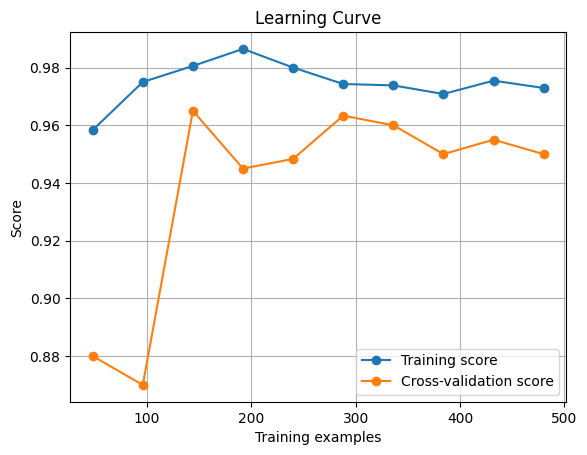

Accuracy on test set all_bands: 0.95


In [3]:
X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=1/6, random_state=42)
svm = DecisionTreeBinClassifier()
svm.train(x_train=X_train, y_train=y_train)

y_pred = svm.evaluate(X_test=X_test, y_test=y_test)
band_acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set all_bands: {band_acc}")